### INFX575 Group Project: Preliminary data analysis

In [2]:
#0.  Setup
# Numpy for working with Arrays
import numpy as np
# Pandas for working with data tables
import pandas as pd
# SciPy implements many different numerical algorithms
import scipy as sp
import scipy.stats as stats
# Module for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Module for pretty plotting
# import seaborn as sns
# Module for linear regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Pump it Up: Data Mining the Water Table 
Team members: Anya, Ashwin, Brett, Wenhong  

Hosted by DrivenData.org    
Source: https://www.drivendata.org/competitions/7/

---

## Preliminary Data Analysis

### Loading data
DrivenData.org provided 3 datasets:  
1. Training set values - the independent variables for the training set  
2. Training set labels - the dependent variable for the training set
3. Test set values - the independent variables that need prediction

We merged dataset \#1 and \#2 into pandas dataframe named 'water'.  'Water' will be used throughout the project as the data for machine learning purposes.  After the preliminary analysis, we will split 'water' into a training set for training algorithms and a validation set for testing the performance of our predictions (unseen during training phase).  In the final stage, we will use dataset \#3 as the actual testing set for making actual predictions and submit our results to DrivenData.org as part of the competition.

In [3]:
### load data from csv files
water_values = pd.read_csv('./data/train_set_values.csv')
water_labels = pd.read_csv('./data/train_set_labels.csv')

In [4]:
### merge values and labels
water = pd.merge(water_values, water_labels, on='id')
print "Merged dataset dimensions: ", water.shape[0], "observations, ", water.shape[1], "variables"
#preview merged data
water.head()

Merged dataset dimensions:  59400 observations,  41 variables


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000,3/14/11,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0,3/6/13,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25,2/25/13,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0,1/28/13,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0,7/13/11,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### 1. What information/features/characteristics do you have for each observation? 
'Water' dataset includes numeric and non-numeric variables. Below we list both.

In [5]:
print "All numeric variables: \n", list(water.select_dtypes(include=[np.number]).columns.values)
print "\nAll non-numeric variables: \n", list(water.select_dtypes(exclude=[np.number]).columns.values)

All numeric variables: 
['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year']

All non-numeric variables: 
['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']


Response variable: 'status_group' - categorical data with 3 possible values:
- functional - the waterpoint is operational and there are no repairs needed
- functional needs repair - the waterpoint is operational, but needs repairs
- non functional - the waterpoint is not operational

Predictor variables: we will evaluate all the other features and determine which should be used as input variables.

Summary of numeric features:  
- id - metadata, a uniqued identifier of each waterpoint
- amount_tsh - quantitative, total static head (or amount water available to waterpoint)
- gps_height, longitude, latitude - quantitative, geographical 3D coordinates
- num_private - no description provided, values range from 0 to 1776
- region_code, district_code - qualitative, unique region and district codes of Tanzania
- population - quantitative, population around the well, units not specified
- construction_year - quantitative, year the waterpoint was constructed, range from 1960 to 2013 

-Summary of non-numeric features: 
- wpt_name - name of waterpoint, if exists, 'none' if doesn't
- waterpoint_type, waterpoint_type_group - qualitative, the kind of waterpoint, i.e. 'communal standpipe', most redundant values
- date_recorded - metadata, row entered date
- recorded_by - metadata, group entering data, all values equal 'GeoData Consultants Ltd.'
- funder, installer - qualitative, organizations that created the well
- basin, region, lga, ward, subvillage - qualitative, geographical locations, hierarchical order
- public_meeting, permit - boolean True/False
- extraction_type_class, extraction_type_group, extraction_type - qualitative, kind of extraction, hierarchical order
- scheme_management, scheme_name - qualitative, who operates the waterpoint, hierarchical order
- management_group, management - qualitative, how the waterpoint is managed (note: 'management' and 'scheme_management' many redundant values)
- payment, payment_type - qualitative, payment arrangements, note: most redundant values
- water_quality, quality_group - qualitative, the quality of water, note: most redundant values
- quantity, quantity_group - qualitative, the quantity of water, note: all redundant values
- source_class - qualitative, the source of water, values: 'groundwater', 'surface', 'unknown'
- source_type, source - qualitative, the source of water, most redundant values

Refer to the original list of features for each waterpoint as provided by DrivenData.org at https://www.drivendata.org/competitions/7/page/25/#features_list.

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the status group for a pump in the test dataset.

### 2.1 Tidy the data

In [6]:
# Exclude records with value '0' over 5%
#               num_private    0.987256
# 1              amount_tsh    0.700993
# 17             population    0.359949
# 23      construction_year    0.348636
# 4              gps_height    0.344074
# 22                 permit    0.294478
# 18         public_meeting    0.085101

# Exclude records with missing categorical values 
# water_not_null = water.dropna()  # remove rows with missing values
water_not_null = water   # not removing rows with missing values
water_not_null = water_not_null.fillna('missing')  # fill in 'missing' with null data

# Exclude id column
water_not_zero_null = water_not_null.drop(['id'], axis=1)

# Fill columns with high % of value '0' with median value
num_features = ['amount_tsh', 'population', 'construction_year', 'gps_height', 'latitude',\
            'longitude', 'num_private']
        
# Exclude columns that are redundant
# water_not_zero_null = water_not_zero_null.drop(['region_code', 'quality_group', 'quantity_group', \
#                                           'scheme_name', 'extraction_type_group', 'source_type', \
#                                                 'payment_type', 'extraction_type_class'], axis=1)

# need to remove schema_name
print water_not_zero_null.columns
print water_not_zero_null.shape

Index([u'amount_tsh', u'date_recorded', u'funder', u'gps_height', u'installer',
       u'longitude', u'latitude', u'wpt_name', u'num_private', u'basin',
       u'subvillage', u'region', u'region_code', u'district_code', u'lga',
       u'ward', u'population', u'public_meeting', u'recorded_by',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group', u'status_group'],
      dtype='object')
(59400, 40)


### 2.2 Normalization

In [7]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 column condensation
1. The values in extraction_type and extraction_type_group are 96% similar. The values in extract_type_class and extract_type_group are about 67% similar.

We will choose the field extraction_type as it contains the most number of unique values comparing to the other two similar fields.

2. Fields payment and payment_type are storing the same information except the description of the payment and payment type is slightly different for some. We can pick either one as the feature for further analysis.

3. Fields water_quality and quality_group are storing similar information except the value in water_quality are more granular.

Fields quantity and quantity_group are storing similar information.
We can pick water_quality and quantity for further feature analysis.

4. Based on the field definition, schema_name and scheme_management both store the information about who operates the waterpoint, since there are less number of missings in schema_management, we will disregard schema_name in further analysis

5. source and source_type store the redundant information. We will exclude source_type ans source has more unique values.


---

### Part 3: Classification

### 3.1 Prepare the data 

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

# standardize the numeric fields: longitude, latitude
num_features = ['amount_tsh', 'population', 'construction_year', 'gps_height', 'latitude',\
            'longitude', 'num_private']

# replace 0s with NaN
for col in num_features:
    water_not_zero_null.loc[:,col].replace(0, np.nan, inplace = True)
        
# impute data
imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent', axis=0, verbose=0,\
                            copy=True)
water_not_zero_null[num_features] = imp.fit_transform(water_not_zero_null[num_features])

water_not_zero_null_std = standardize(water_not_zero_null[num_features])

cat_features = ['basin', 'region', 'district_code', 'scheme_management', 'extraction_type', \
                 'permit', 'public_meeting', 'management',\
                                            'payment', 'water_quality', \
                                            'quantity', 'source', \
                                            'recorded_by']

# include all categorical features
# cat_features = ['region_code', 'district_code', 'basin', 'region', 'public_meeting', \
#                 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', \
#                 'management', 'payment', 'water_quality', 'quantity', \
#                 'source', 'waterpoint_type', 'date_recorded', 'recorded_by', 'funder', 'installer', \
#                'lga', 'ward', 'scheme_name', 'management_group', 'wpt_name', 'subvillage', \
#                'payment_type', 'quality_group', 'quantity_group', 'source_class', 'source_type', 'waterpoint_type_group']

# create dummy variables
water_not_zero_null_cat = pd.get_dummies(water_not_zero_null[cat_features])
#water_not_zero_null_cat = water_not_zero_null[cat_features]  # try without making dummy variables

print "shapae of category datagrame after get_dummy: ", water_not_zero_null_cat.shape

# consolidate the features
features = water_not_zero_null_std.columns | water_not_zero_null_cat.columns

# stich the dataframes 
water_tidy = pd.concat([water_not_zero_null_std, water_not_zero_null_cat, \
                       water_not_zero_null.status_group], axis=1)
# water_tidy = pd.concat([water_not_zero_null_cat, \
#                        water_not_zero_null.status_group], axis=1)

water_tidy = water_tidy.reset_index(drop=True)
print water_tidy.shape
water_tidy.head()

shapae of category datagrame after get_dummy:  (59400, 111)
(59400, 119)


,amount_tsh,population,construction_year,gps_height,latitude,longitude,num_private,district_code,basin_Internal,basin_Lake Nyasa,...,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,recorded_by_GeoData Consultants Ltd,status_group
0,1.795834,-0.151207,-0.203236,1.041195,-1.408791,-0.039380,-0.033076,5,0,1,...,0,0,0,0,0,0,1,0,1,functional
1,-0.056634,0.211588,0.723795,1.054087,1.207934,-0.130098,-0.033076,2,0,0,...,0,0,0,1,0,0,0,0,1,functional
2,-0.216620,0.147940,0.639519,0.032751,0.639751,0.916817,-0.033076,4,0,0,...,0,0,0,0,0,0,0,0,1,functional
3,-0.056634,-0.259409,-1.298818,-0.573174,-1.849720,1.305538,-0.033076,63,0,0,...,0,1,0,0,0,0,0,0,1,non functional
4,-0.056634,-0.380340,0.723795,-0.971395,1.317271,-1.482541,-0.033076,1,0,0,...,0,0,0,1,0,0,0,0,1,functional


#### Find the features that could be used by random forest classification

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 5 (0.145412)
2. feature 4 (0.144551)
3. feature 102 (0.075001)
4. feature 3 (0.069393)
5. feature 2 (0.050174)
6. feature 1 (0.046641)
7. feature 60 (0.041223)
8. feature 103 (0.030262)
9. feature 7 (0.020310)
10. feature 87 (0.016707)
11. feature 104 (0.015266)
12. feature 0 (0.012253)
13. feature 59 (0.010806)
14. feature 54 (0.010244)
15. feature 115 (0.009119)
16. feature 70 (0.008289)
17. feature 82 (0.008258)
18. feature 105 (0.007995)
19. feature 69 (0.007977)
20. feature 100 (0.007673)
21. feature 93 (0.007607)
22. feature 114 (0.007496)
23. feature 73 (0.007165)
24. feature 91 (0.007025)
25. feature 45 (0.006885)
26. feature 110 (0.006517)
27. feature 101 (0.006491)
28. feature 90 (0.006416)
29. feature 20 (0.006393)
30. feature 72 (0.005954)
31. feature 113 (0.005947)
32. feature 8 (0.005122)
33. feature 112 (0.004999)
34. feature 58 (0.004847)
35. feature 66 (0.004836)
36. feature 9 

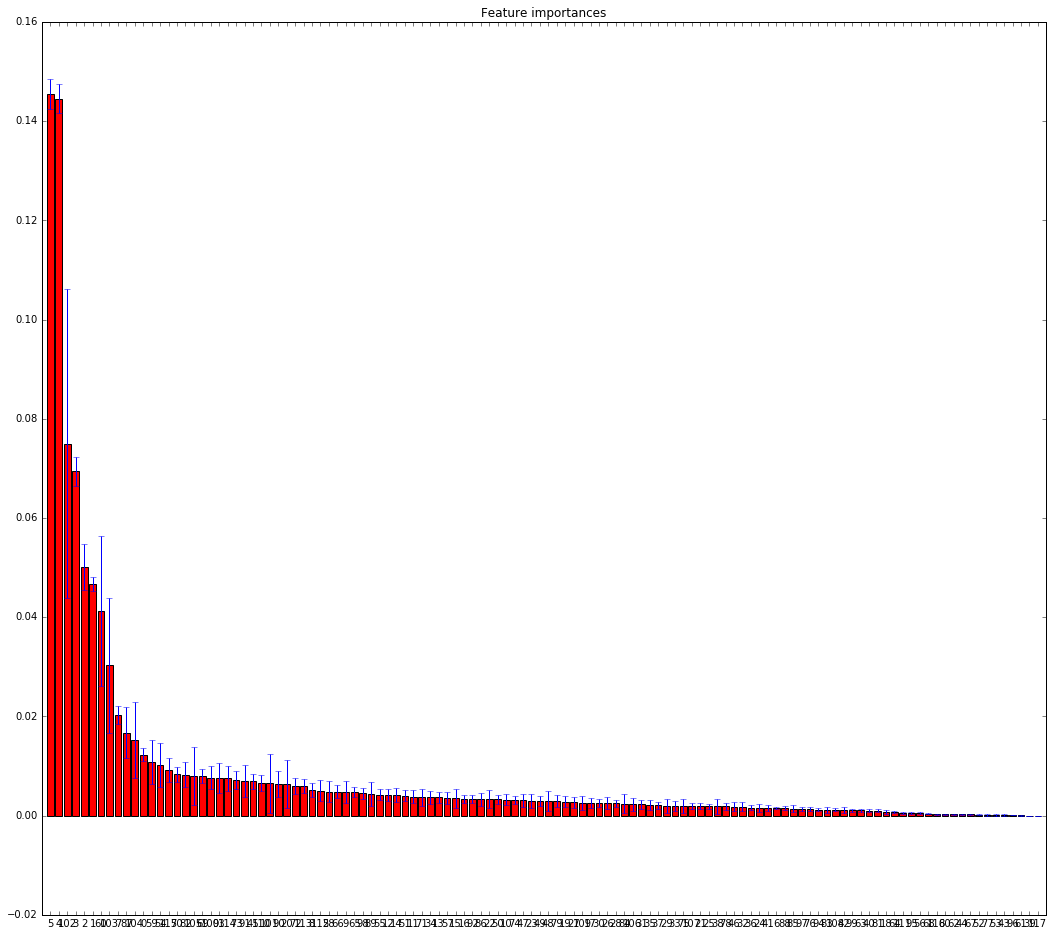

In [9]:
# Reference: http://scikit-learn.org/stable/modules/ensemble.html#forest

# feature importance
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# exclude the status_group which is the response variable
# X = water_tidy[water_tidy.columns[0:101]] # features
X = water_tidy[water_tidy.columns[:-1]] # features excluding status_group
y, _ = pd.factorize(water_tidy.status_group)  # status_group

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=200,
                              random_state=11)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
   
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18, 16))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [10]:
water_tidy.columns

Index([u'amount_tsh', u'population', u'construction_year', u'gps_height',
       u'latitude', u'longitude', u'num_private', u'district_code',
       u'basin_Internal', u'basin_Lake Nyasa',
       ...
       u'source_lake', u'source_machine dbh', u'source_other',
       u'source_rainwater harvesting', u'source_river', u'source_shallow well',
       u'source_spring', u'source_unknown',
       u'recorded_by_GeoData Consultants Ltd', u'status_group'],
      dtype='object', length=119)

### 3.2 Divide data into training and testing datasets 

Randomly select 80% of the data and put this in a training dataset (call this "water_train"), and place the remaining 20% in a testing dataset (call this "water_test")

In [45]:
# reference: http://www.analyticbridge.com/profiles/blogs/random-forest-in-python

# test
#results = forest.predict(testArr)
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn import metrics


# divide data into traininga and test
# ensure the "random" split is the same "random" split used by the rest of the class
# np.random.seed(seed=13579)

# water_train, water_test = train_test_split(water_tidy, test_size = 0.2)
# water_train = water_train.reset_index(drop=True)
# water_test = water_test.reset_index(drop=True)


X = water_tidy[features] # features
y, _ = pd.factorize(water_tidy['status_group'])  # status_group

X_train, X_test, y_train, y_test = \
cross_validation.train_test_split(X, y, test_size=0.2, random_state=11)

print "Data partitions created"
print X_train.shape
print X_test.shape

# select top features based on importance

# features = [5,4,102,3,2,1,60,103,7,87,104,0,59,\
#            54,115,82,70,69,100,91,105,93,114,20,101,73,45,110]



'''
i=0
avg_pscore_test = 0

for train, test in kf:

    X_train = water_train.ix[train, features] # features
    y_train, _ = pd.factorize(water_train.ix[train, 'status_group'])  # status_group

    X_test = water_train.ix[test, features] # features
    y_test, _ = pd.factorize(water_train.ix[test, 'status_group'])  # status_group
 
    rf.fit(X_train, y_train)
    
    result_train = rf.predict(X_train)
    result_test = rf.predict(X_test)

    print "i: ", i
    
    pscore_train = metrics.accuracy_score(y_train, result_train)
    print "train accuracy: ", pscore_train 
    
    pscore_test = metrics.accuracy_score(y_test, result_test)
    print "test accuracy: ", pscore_test

    avg_pscore_test += pscore_test   
    i=i+1
    
avg_match_rate = avg_pscore_test / i  # 10-folds
print "Average predication accuracy: ", avg_match_rate
'''

Data partitions created
(47520, 118)
(11880, 118)


'\ni=0\navg_pscore_test = 0\n\nfor train, test in kf:\n\n    X_train = water_train.ix[train, features] # features\n    y_train, _ = pd.factorize(water_train.ix[train, \'status_group\'])  # status_group\n\n    X_test = water_train.ix[test, features] # features\n    y_test, _ = pd.factorize(water_train.ix[test, \'status_group\'])  # status_group\n \n    rf.fit(X_train, y_train)\n    \n    result_train = rf.predict(X_train)\n    result_test = rf.predict(X_test)\n\n    print "i: ", i\n    \n    pscore_train = metrics.accuracy_score(y_train, result_train)\n    print "train accuracy: ", pscore_train \n    \n    pscore_test = metrics.accuracy_score(y_test, result_test)\n    print "test accuracy: ", pscore_test\n\n    avg_pscore_test += pscore_test   \n    i=i+1\n    \navg_match_rate = avg_pscore_test / i  # 10-folds\nprint "Average predication accuracy: ", avg_match_rate\n'

### 3.3 Cross Validate

#### PCA

In [41]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)
pca = PCA(n_components=30)  # adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
clf = SVC()
clf.fit(X_t_train, y_train)

# create prediction accuracy function to be used in cross val
def predict_accuracy(model, x,y):
    y_hat = model.predict(x)
    return np.mean(y_hat == y)

# cross validation
score = cross_validation.cross_val_score(clf, X_train, y_train, scoring = predict_accuracy, cv=5).mean()

print 'score from cross_val_score', score

score from cross_val_score 0.7308925448


### 3.4 Make prediction on the hold out test set

In [ ]:
# X_test = water_test[features] # features
# y_test, _ = pd.factorize(water_test['status_group'])  # status_group

# result_test = rf.predict(X_test)
# pscore_test = metrics.accuracy_score(y_test, result_test)
# print "test accuracy: ", pscore_test 

print 'score from hold out test', clf.score(X_t_test, y_test)
print 'pred label', clf.predict(X_t_test)

In [ ]:
# check mismatch distribution
'''
pred[pred['actual']==0].groupby('pred').size()
'''

In [ ]:
# X_test.columns

### 3.5 Make prediction on the test data
#### 3.5.1 Prepare the test data

In [43]:
# Load the test file
test_value_df=pd.read_csv('./data/test_set_values.csv')

# Count the rows and columns
print test_value_df.shape

# Tidy the data
test_value = test_value_df.fillna('missing')  # fill in 'missing' with null data

# Exclude id column
test_value = test_value.drop(['id'], axis=1)

# Fill columns with high % of value '0' with median value
num_features = ['amount_tsh', 'population', 'construction_year', 'gps_height', 'latitude',\
            'longitude', 'num_private']

# Exclude columns that are redundant
test_value = test_value.drop(['region_code', 'quality_group', 'quantity_group', \
                                          'scheme_name', 'extraction_type_group', 'source_type', \
                                                'payment_type', 'extraction_type_class'], axis=1)

# replace 0s with NaN
for col in num_features:
    test_value.loc[:,col].replace(0, np.nan, inplace = True)
        
# impute data
imp = preprocessing.Imputer(missing_values='NaN', strategy='most_frequent', axis=0, verbose=0,\
                            copy=True)
test_value[num_features] = imp.fit_transform(test_value[num_features])

test_value_std = standardize(test_value[num_features])

cat_features = ['basin', 'region', 'district_code', 'scheme_management', 'extraction_type', \
                 'permit', 'public_meeting', 'management',\
                                            'payment', 'water_quality', \
                                            'quantity', 'source', \
                                            'recorded_by']


# create dummy variables
test_value_cat = pd.get_dummies(test_value[cat_features])

# stich the dataframes 
test_value_tidy = pd.concat([test_value_std, test_value_cat], axis=1)

test_value_tidy = test_value_tidy.reset_index(drop=True)
print test_value_tidy.shape
test_value_tidy.head()

(14850, 40)
(14850, 116)


,amount_tsh,population,construction_year,gps_height,latitude,longitude,num_private,district_code,basin_Internal,basin_Lake Nyasa,...,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,recorded_by_GeoData Consultants Ltd
0,-0.070005,0.290874,0.886171,1.931686,0.552598,0.083019,-0.049521,3,1,0,...,0,0,0,0,1,0,0,0,0,1
1,-0.070005,0.246130,-0.143058,1.319576,0.807803,0.607803,-0.049521,2,0,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.070005,0.672261,0.714633,1.316709,0.231366,-0.117893,-0.049521,2,1,0,...,0,0,0,0,1,0,0,0,0,1
3,-0.070005,0.139597,-1.258056,-0.546857,-1.269746,1.146199,-0.049521,43,0,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.070005,-0.265227,-0.143058,0.876621,-1.790621,-0.026354,-0.049521,3,0,0,...,0,0,0,0,0,0,0,1,0,1


### 3.5.2 Predict on the test set after tidy

In [47]:
# impute values which don't exist
test_value_tidy['extraction_type_other - mkulima/shinyanga'] = 0
test_value_tidy['scheme_management_None'] = 0

# predict
test = test_value_tidy[features]

X_test = pca.transform(test)
pred = clf.predict(X_test)

# Output prediction on test to the file
output = pd.DataFrame(test_value_df.id) #create a dataframe for outputs
output.columns = ['id']
output['status_group'] = pred

map_dict = {0: 'functional', 1: 'non functional', 2: 'functional needs repair'}
output['status_group'] = output['status_group'].map(map_dict)

# Output data to a csv file
print "Output data to file"
output.to_csv('pump_test_prediction_pca_svc.csv', index=False) # Skip index column

Output data to file
